# Learning scikit-learn 

## Introducción a Machine Learning en Python

# Table of Contents

* [1 Introduction to Machine Learning](#1-Introduction-to-Machine-Learning)
* [2 Linear Regression](#2-Linear-Regression)
    * [Loading the dataset](#Loading-the-dataset)
    * [Preparing the dataset](#Preparing-the-dataset)
    * [Fitting the model](#Fitting-the-model)
    * [Evaluating the model](#Evaluating-the-model)
* [3 Introduction to Classification](#3-Introduction-to-Classification)
    * [The Iris dataset](#The-Iris-dataset)
    * [Class label encoding](#Class-label-encoding)
    * [Scikit-learn's in-build datasets](#Scikit-learn's-in-build-datasets)
    * [Test/train splits](#Test/train-splits)
    * [Logistic Regression](#Logistic-Regression)
    * [K-Nearest Neighbors](#K-Nearest-Neighbors)
    * [3 - Exercises](#3---Exercises)
* [4 - Feature Preprocessing & scikit-learn Pipelines](#4---Feature-Preprocessing-&-scikit-learn-Pipelines)
    * [Categorical features: nominal vs ordinal](#Categorical-features:-nominal-vs-ordinal)
    * [Normalization](#Normalization)
    * [Pipelines](#Pipelines)
    * [4 - Exercises](#4---Exercises)
* [5 - Dimensionality Reduction: Feature Selection & Extraction](#5---Dimensionality-Reduction:-Feature-Selection-&-Extraction)
    * [Recursive Feature Elimination](#Recursive-Feature-Elimination)
    * [Sequential Feature Selection](#Sequential-Feature-Selection)
    * [Principal Component Analysis](#Principal-Component-Analysis)
* [6 - Model Evaluation & Hyperparameter Tuning](#6---Model-Evaluation-&-Hyperparameter-Tuning)
    * [Wine Dataset](#Wine-Dataset)
    * [Stratified K-Fold](#Stratified-K-Fold)
    * [Grid Search](#Grid-Search)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Matplotlib is building the font cache using fc-list. This may take a moment.


# 1 Introduction to Machine Learning

<div style='height:100px;'></div>

# 2 Linear Regression

### Loading the dataset

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
to the Size of the Head", Biometrika, Vol. 4, pp105-123


Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.


Variables/Columns
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)


In [2]:
df = pd.read_csv('dataset_brain.txt', 
                 encoding='utf-8', 
                 comment='#',
                 sep='\s+')
df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


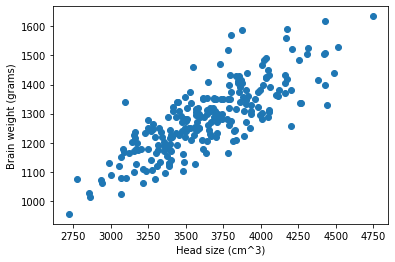

In [3]:
plt.scatter(df['head-size'], df['brain-weight'])
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Preparing the dataset

In [4]:
y = df['brain-weight'].values
y.shape

(237,)

In [5]:
X = df['head-size'].values
X = X[:, np.newaxis]
X.shape

(237, 1)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

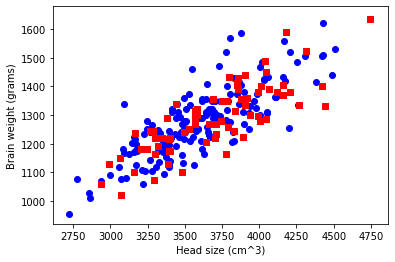

In [7]:
plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='s')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Fitting the model

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

### Evaluating the model

In [9]:
sum_of_squares = ((y_test - y_pred) ** 2).sum()
res_sum_of_squares = ((y_test - y_test.mean()) ** 2).sum()
r2_score = 1 - (sum_of_squares / res_sum_of_squares)
print('R2 score: %.3f' % r2_score)

R2 score: 0.635


In [10]:
print('R2 score: %.3f' % lr.score(X_test, y_test))

R2 score: 0.635


In [11]:
lr.coef_

array([0.271117])

In [12]:
lr.intercept_

302.03033196088086

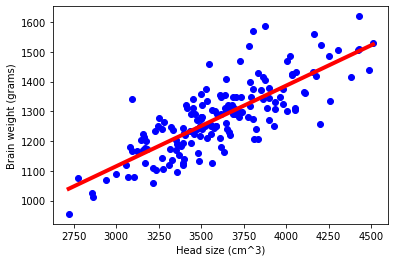

In [13]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='red',
         linewidth=4)
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

<div style='height:100px;'></div>

# 3 Introduction to Classification

### The Iris dataset

In [14]:
df = pd.read_csv('dataset_iris.txt', 
                 encoding='utf-8', 
                 comment='#',
                 sep=',')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
X = df.iloc[:, :4].values 
y = df['class'].values
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Class label encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

l_encoder = LabelEncoder()
l_encoder.fit(y)
l_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)

array([0, 1, 2])

In [18]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Scikit-learn's in-build datasets

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Test/train splits

In [20]:
X, y = iris.data[:, :2], iris.target
# ! We only use 2 features for visual purposes

print('Class labels:', np.unique(y))
print('Class proportions:', np.bincount(y))

Class labels: [0 1 2]
Class proportions: [50 50 50]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2]
Class proportions: [32 40 33]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123,
        stratify=y)

print('Class labels:', np.unique(y_train))
print('Class proportions:', np.bincount(y_train))

Class labels: [0 1 2]
Class proportions: [35 35 35]


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', 
                        multi_class='multinomial', 
                        random_state=1)

lr.fit(X_train, y_train)
print('Test accuracy %.2f' % lr.score(X_test, y_test))

Test accuracy 0.80


In [28]:
def get_columns(X, column_indices):
    try:
        return X[:, column_indices]
    except TypeError:
        return X.iloc[:, column_indices]

In [ ]:
from mlxtend.evaluate import 

In [32]:
from mlxtend.evaluate import plot_decision_regions

plot_decision_regions(X=get_column(X, [1, 2]), y=y, clf=lr, X_highlight=X_test)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');


ImportError: cannot import name 'plot_decision_regions'

### K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=4)

kn.fit(X_train, y_train)
print('Test accuracy %.2f' % kn.score(X_test, y_test))

In [ ]:
plot_decision_regions(X=X, y=y, clf=kn, X_highlight=X_test)
plt.xlabel('sepal length [cm]')
plt.xlabel('sepal width [cm]');

### 3 - Exercises

- Which of the two models above would you prefer if you had to choose? Why?
- What would be possible ways to resolve ties in KNN when `n_neighbors` is an even number?
- Can you find the right spot in the scikit-learn documentation to read about how scikit-learn handles this?
- Train & evaluate the Logistic Regression and KNN algorithms on the 4-dimensional iris datasets. 
  - What performance do you observe? 
  - Why is it different vs. using only 2 dimensions? 
  - Would adding more dimensions help?

<div style='height:100px;'></div>

# 4 - Feature Preprocessing & scikit-learn Pipelines

### Categorical features: nominal vs ordinal

In [ ]:
import pandas as pd

df = pd.DataFrame([
            ['green', 'M', 10.0], 
            ['red', 'L', 13.5], 
            ['blue', 'XL', 15.3]])

df.columns = ['color', 'size', 'prize']
df

In [ ]:
from sklearn.feature_extraction import DictVectorizer

dvec = DictVectorizer(sparse=False)

X = dvec.fit_transform(df.transpose().to_dict().values())
X

In [ ]:
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}

df['size'] = df['size'].map(size_mapping)
df

In [ ]:
X = dvec.fit_transform(df.transpose().to_dict().values())
X

### Normalization

In [ ]:
df = pd.DataFrame([1., 2., 3., 4., 5., 6.], columns=['feature'])
df

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mmxsc = MinMaxScaler()
stdsc = StandardScaler()

X = df['feature'].values[:, np.newaxis]

df['minmax'] = mmxsc.fit_transform(X)
df['z-score'] = stdsc.fit_transform(X)

df

### Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123,
        stratify=y)

lr = LogisticRegression(solver='newton-cg', 
                        multi_class='multinomial', 
                        random_state=1)

lr_pipe = make_pipeline(StandardScaler(), lr)

lr_pipe.fit(X_train, y_train)
lr_pipe.score(X_test, y_test)

In [ ]:
lr_pipe.named_steps

In [ ]:
lr_pipe.named_steps['standardscaler'].transform(X[:5])

### 4 - Exercises

- Why is it important that we scale test and training sets separately?
- Fit a KNN classifier to the standardized Iris dataset. Do you notice difference in the predictive performance of the model compared to the non-standardized one? Why or why not?

<div style='height:100px;'></div>

# 5 - Dimensionality Reduction: Feature Selection & Extraction

In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123, stratify=y)

### Recursive Feature Elimination

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

lr = LogisticRegression()
rfe = RFECV(lr, step=1, cv=5, scoring='accuracy')

rfe.fit(X_train, y_train)
print('Number of features:', rfe.n_features_)
print('Feature ranking', rfe.ranking_)

### Sequential Feature Selection

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import plot_sequential_feature_selection as plot_sfs


sfs = SFS(lr, k_features=4, forward=True, floating=False, cv=5)

sfs.fit(X_train, y_train)
sfs = SFS(lr, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=2)

sfs = sfs.fit(X, y)
fig1 = plot_sfs(sfs.get_metric_dict())

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()

In [ ]:
sfs.subsets_

### Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
pca = PCA(n_components=4)

pca.fit_transform(X_train, y_train)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

idx = [i for i in range(len(var_exp))]
labels = [str(i + 1) for i in idx]
with plt.style.context('seaborn-whitegrid'):
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.xticks(idx, labels)
    plt.legend(loc='center right')
    plt.tight_layout()
    plt.show()

In [ ]:
X_train_pca = pca.transform(X_train)

for lab, col, mar in zip((0, 1, 2),
                         ('blue', 'red', 'green'),
                         ('o', 's', '^')):
    plt.scatter(X_train_pca[y_train == lab, 0],
                X_train_pca[y_train == lab, 1],
                label=lab,
                marker=mar,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower right')
plt.tight_layout()

<div style='height:100px;'></div>

# 6 - Model Evaluation & Hyperparameter Tuning

### Wine Dataset

In [ ]:
from mlxtend.data import wine_data

X, y = wine_data()

Wine dataset.

Source : https://archive.ics.uci.edu/ml/datasets/Wine

Number of samples : 178

Class labels : {0, 1, 2}, distribution: [59, 71, 48]

Dataset Attributes:

1. Alcohol
2. Malic acid
3. Ash
4. Alcalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. OD280/OD315 of diluted wines
13. Proline


### Stratified K-Fold

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier as KNN

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=123, stratify=y)

pipe_kn = make_pipeline(StandardScaler(), 
                        PCA(n_components=1),
                        KNN(n_neighbors=3))

kfold = StratifiedKFold(y=y_train, 
                        n_folds=10,
                        random_state=1)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_kn.fit(X_train[train], y_train[train])
    score = pipe_kn.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_kn,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=2)

print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

### Grid Search

In [ ]:
pipe_kn.named_steps

In [ ]:
from sklearn.grid_search import GridSearchCV


param_grid = {'pca__n_components': [1, 2, 3, 4, 5, 6, None],
              'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9, 11]}

gs = GridSearchCV(estimator=pipe_kn, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=2,
                  refit=True)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
gs.score(X_test, y_test)